In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

In [2]:
DATA_PATH = './data/'
with open(DATA_PATH+'importance_scores.pkl','rb') as f:
    scores_labels = pickle.load(f)

In [3]:
len(scores_labels)

140

In [5]:
scl = scores_labels[0] # look at dataframe for first graph

In [6]:
# cell type counts for 100 most important cells in first graph
scl.sort_values('score_campp',ascending=False).cell_type[:100].value_counts()

tumor cells             76
vasculature             15
granulocytes             5
CD8+ T cells             2
dirt                     1
CD4+ T cells CD45RO+     1
Name: cell_type, dtype: int64

In [7]:
# cell type counts for 100 most important cells in first graph, using slightly
# different metric
scl.sort_values('score_cam',ascending=False).cell_type[:100].value_counts()

tumor cells             75
vasculature             14
granulocytes             7
CD8+ T cells             2
dirt                     1
CD4+ T cells CD45RO+     1
Name: cell_type, dtype: int64

In [9]:
# cell type counts in entire graph
scl.cell_type.value_counts()

tumor cells                   2189
granulocytes                   181
vasculature                     64
smooth muscle                   55
dirt                            47
stroma                          37
CD8+ T cells                    18
CD68+CD163+ macrophages         16
tumor cells / immune cells      12
B cells                         10
CD4+ T cells CD45RO+             9
undefined                        9
Tregs                            6
nerves                           5
adipocytes                       4
immune cells                     3
CD11c+ DCs                       1
CD68+ macrophages                1
immune cells / vasculature       1
lymphatics                       1
plasma cells                     1
Name: cell_type, dtype: int64

In [10]:
# actual stage and predicted stage
scl.attrs

{'stage': 3.0, 'pred': 3.0}

In [11]:
# list of dataframes for graphs that we predicted wrong
mismatch = [scl for scl in scores_labels if scl.attrs['stage'] != scl.attrs['pred']]

In [12]:
len(mismatch)

7

In [18]:
scl = mismatch[5]

In [19]:
scl.sort_values('score_campp',ascending=False).cell_type[:100].value_counts()

CD68+CD163+ macrophages       27
B cells                       27
adipocytes                    12
undefined                     11
immune cells / vasculature     8
stroma                         4
tumor cells                    4
vasculature                    3
immune cells                   2
dirt                           1
plasma cells                   1
Name: cell_type, dtype: int64

In [20]:
scl.sort_values('score_campp',ascending=False).head()

,cell_type,score_campp,score_cam,X,Y,cell_id,graph_id
603,B cells,0.777668,0.783499,468.0,65.0,210697,137
304,CD68+CD163+ macrophages,0.651524,0.816143,987.0,220.0,157233,137
424,adipocytes,0.651524,0.816143,952.0,190.0,159646,137
586,B cells,0.638378,0.641384,401.0,132.0,210680,137
553,B cells,0.613860,0.617660,288.0,202.0,210647,137


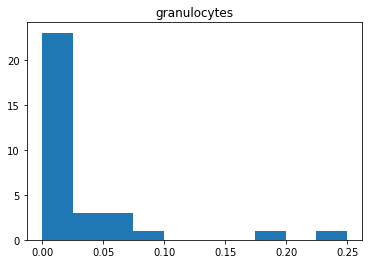

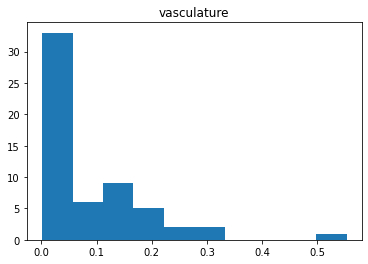

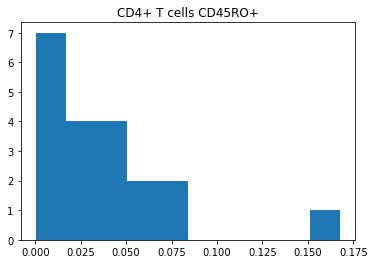

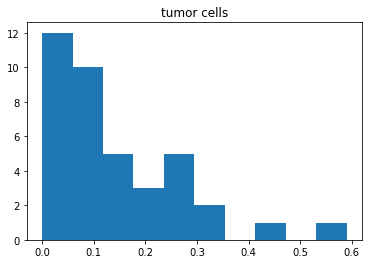

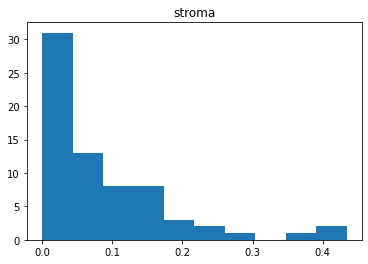

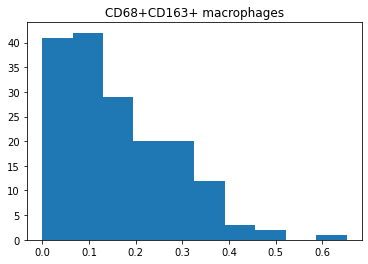

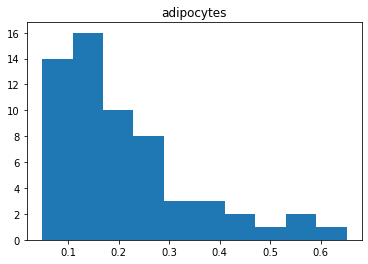

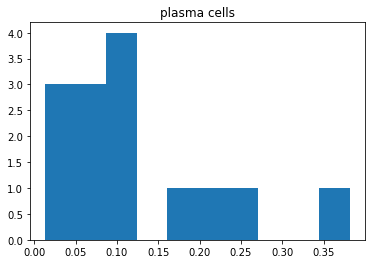

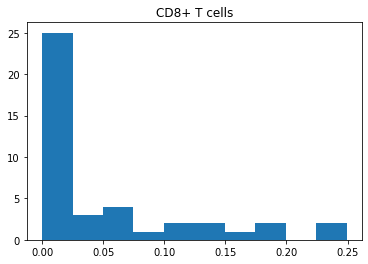

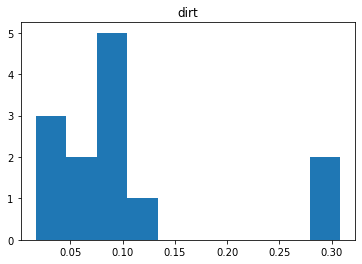

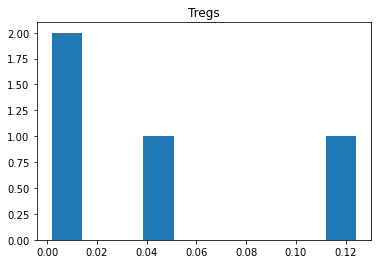

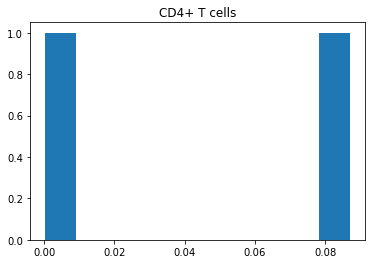

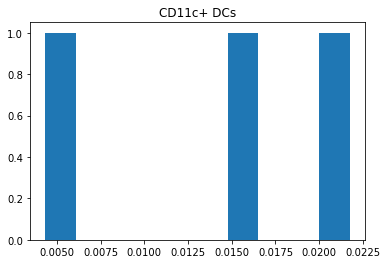

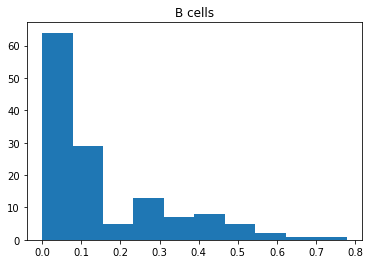

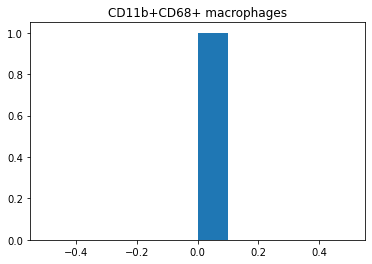

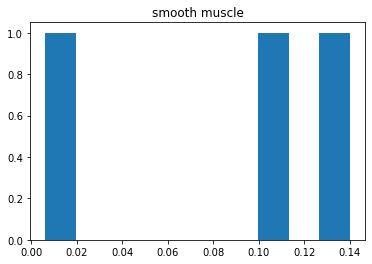

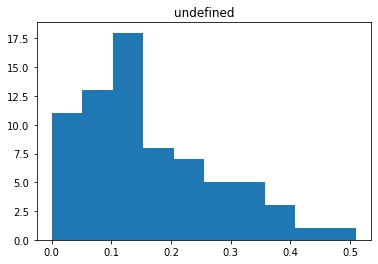

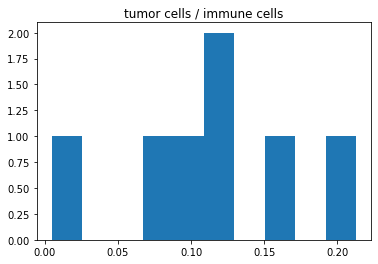

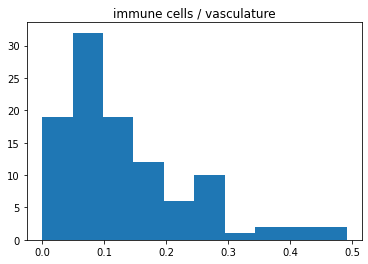

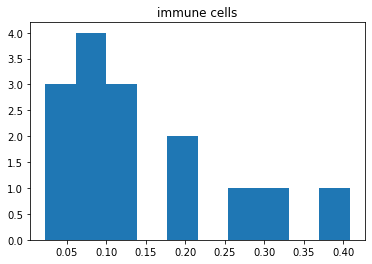

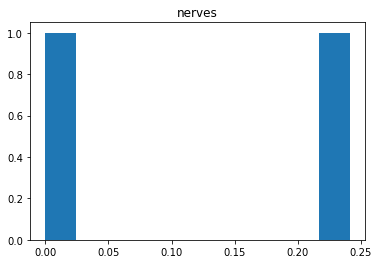

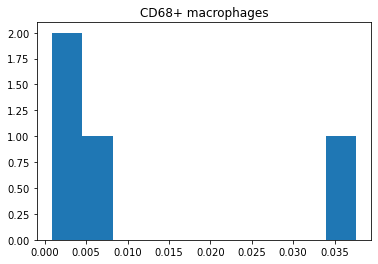

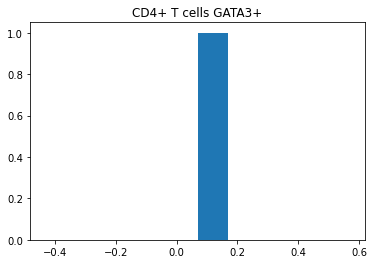

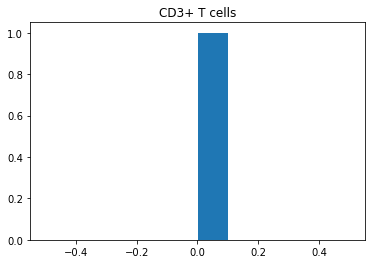

In [21]:
# plot histogram of scores per cell type
for ct in scl.cell_type.unique():
    plt.hist(scl[scl['cell_type'] == ct].score_campp)
    plt.title(ct)
    plt.show()